In [19]:
# Instalar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier


In [3]:
#Paquetes para lectura y recuento
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [4]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [59]:
breast_cancer_wisconsin_diagnostic

{'data': {'ids':            ID
  0      842302
  1      842517
  2    84300903
  3    84348301
  4    84358402
  ..        ...
  564    926424
  565    926682
  566    926954
  567    927241
  568     92751
  
  [569 rows x 1 columns],
  'features':      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
  0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
  1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
  2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
  3      11.42     20.38       77.58   386.1      0.14250       0.28390   
  4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
  ..       ...       ...         ...     ...          ...           ...   
  564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
  565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
  566    16.60     28.08      108.30   858.1      0.08455       0.10230   
  

In [5]:
#Primero importamos los datos que vamos a leer
cancer_data = load_breast_cancer()

In [6]:
#Pasamos los datos a un DataFrame (datos en pandas)
X = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
y = pd.DataFrame(cancer_data['target'],columns = ['Tumor Type'])

#Tomamos las caracteísticas explicativas

X = X[['mean radius', 'mean texture','mean perimeter']]
X

Benigno = y.sum()
Maligno = y.shape[0]- Benigno
print('Benignos: ', Benigno, ' , Malignos: ', Maligno )

Benignos:  Tumor Type    357
dtype: int64  , Malignos:  Tumor Type    212
dtype: int64


In [51]:
Benigno

Tumor Type    357
dtype: int64

In [62]:
X

,mean radius,mean texture,mean perimeter
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10
...,...,...,...
564,21.56,22.39,142.00
565,20.13,28.25,131.20
566,16.60,28.08,108.30
567,20.60,29.33,140.10


In [52]:
y

,Tumor Type
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [67]:
#MODELO REGRESIÓN LOGISTICA
modelLR = LogisticRegression()

In [68]:
# Se divide el conjunto de datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [10]:
X_train

,mean radius,mean texture,mean perimeter
293,11.850,17.46,75.54
332,11.220,19.86,71.94
565,20.130,28.25,131.20
278,13.590,17.84,86.24
489,16.690,20.20,107.10
...,...,...,...
277,18.810,19.98,120.90
9,12.460,24.04,83.97
359,9.436,18.32,59.82
192,9.720,18.22,60.73


In [30]:
y_train

,Tumor Type
287,1
512,0
402,1
446,0
210,0
...,...
71,1
106,1
270,1
435,0


In [69]:
#3. Entrenamiento del modelo
modelLR.fit(X_train, y_train)

#4. Predicción con el modelo para el test
y_pred = modelLR.predict(X_test)


C:\Users\michu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#Informe de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))
#print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.97      0.93      0.95        89

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

[[51  3]
 [ 6 83]]


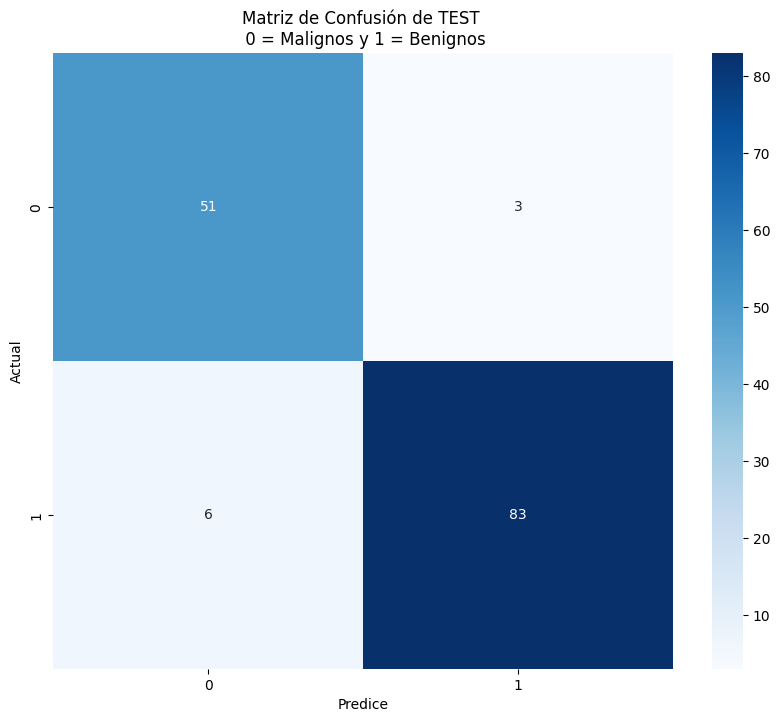

In [71]:
# Dibujar la matriz de confusión, en donde 0 = malicious y 1 = non-malicious
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TEST \n 0 = Malignos y 1 = Benignos')
plt.show()

In [72]:
#MODELO ÁRBOL DE DECISIÓN
#1. Inicialización.
modelDT = DecisionTreeClassifier()



In [73]:
#2. División de datos en conjunto de evaluación y conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [74]:
#3. Entrenamiento del modelo
modelDT.fit(X_train,y_train)


DecisionTreeClassifier()

In [75]:
#4. Predicción con el modelo
y_pred = modelDT.predict(X_test)

In [76]:
#Informe de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))
#print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.95      0.92      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

[[50  4]
 [ 7 82]]


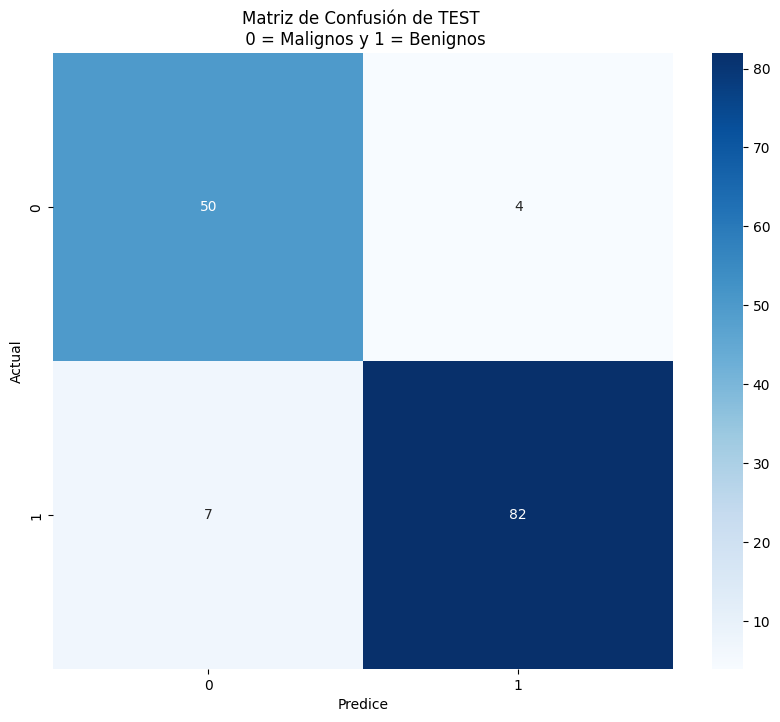

In [77]:
# Dibujar la matriz de confusión, en donde 0 = Malignos y 1 = Beningnos
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TEST \n 0 = Malignos y 1 = Benignos')
plt.show()

In [80]:
########################################
# ENTRENAMIENTO del modelo RandomForest#
########################################
modelRF = RandomForestClassifier(n_estimators=10, random_state=0, max_depth = 2)


In [81]:
#2. División de datos en conjunto de evaluación y conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [82]:
#3. Entrenamiento del modelo
modelRF.fit(X_train, y_train)

C:\Users\michu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)

In [83]:
#4. Predicción con el modelo
y_pred= modelRF.predict(X_test)

In [84]:
#Informe de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))
#print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        54
           1       0.91      0.97      0.94        89

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143

[[46  8]
 [ 3 86]]


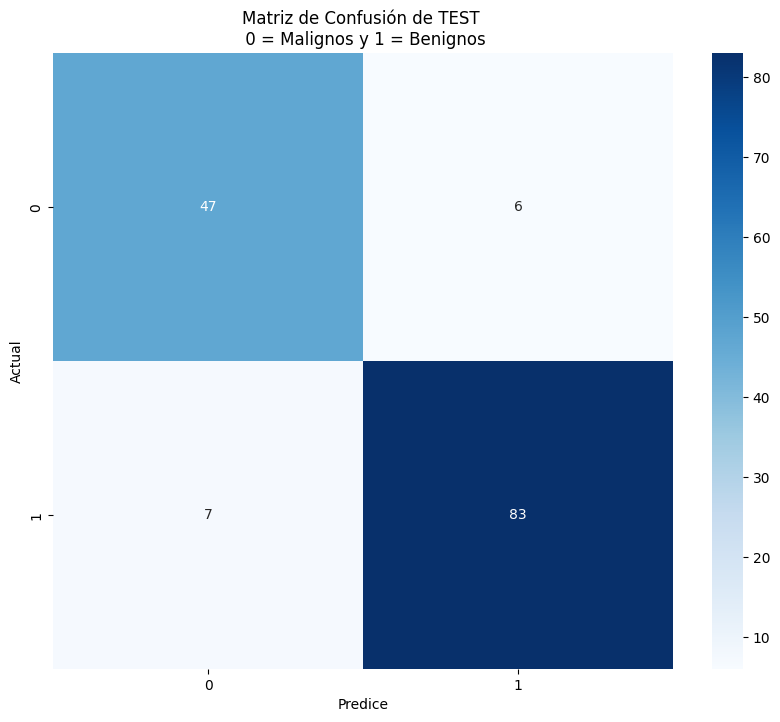

In [53]:
# Dibujar la matriz de confusión, en donde 0 = Malignos y 1 = Beningnos
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predice')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de TEST \n 0 = Malignos y 1 = Benignos')
plt.show()

In [62]:
#########################################################
# ENTRENAMIENTO del modelo SVM (Support Vector Machines)#
#########################################################
modelo_svc = SVC(gamma = 0.1)
modelo_svc.fit(X_train, y_train)

C:\Users\michu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1)

In [63]:
#Predecir los resultados para el conjunto de TEST.
y_pred = modelo_svc.predict(X_test)

In [64]:
#Informe de clasificación y matriz de confusión
print(classification_report(y_test, y_pred))
#print(f'Accuracy (exactitud): {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.92      0.90      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143

[[46  7]
 [ 9 81]]
